<a href="https://colab.research.google.com/github/erikluu/lab-2-phase-2-erikluu/blob/main/DATA_301_Lab_2A_Erik_Luu%2C_Evelyn_Tran%2C_Brandon_Brownell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](http://abc.go.com/shows/shark-tank) to get a sense of how it works.

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [ ]:
import pandas as pd

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `https://dlsun.github.io/pods/data/sharktank.csv`. Read in the data into a Pandas `DataFrame`.



In [ ]:
df_sharks = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
df_sharks

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,"$100,000",10%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,"$225,000",8%,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,"$300,000",20%,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [ ]:
# YOUR CODE HERE
# Erik's code
# df_sharks = pd.read_csv("https://dlsun.github.io/pods/data/sharktank.csv")
# df_sharks[["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]] = df_sharks[["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]].fillna(0.0)
# df_sharks[300:313]

# Brandon's Code
df_sharks[df_sharks.columns[8:15]] = df_sharks[df_sharks.columns[8:15]].fillna(0)

Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [ ]:
# YOUR CODE HERE
# Erik's code
# def amountToInt(s):
#   if isinstance(s, str):
#     for c in ["$", ","]:
#       s = s.replace(c, "")
#     return int(s)
#   return s
    
# def equityToFloat(s):
#   if isinstance(s, str):
#     s = s.replace("%", "")
#     equity = float(s) / 100
#     if equity == 0:
#       return None
#     return equity
#   return s

# df_sharks["Amount"] = df_sharks["Amount"].apply(amountToInt)
# df_sharks["Equity"] = df_sharks["Equity"].apply(equityToFloat)

# Evelyn's Code
df_sharks["Amount"] = df_sharks["Amount"].str.replace(',', '')
df_sharks["Amount"] = df_sharks["Amount"].str.replace('$', '')
df_sharks["Amount"] = df_sharks["Amount"].astype(float)

df_sharks["Equity"] = df_sharks["Equity"].str.rstrip('%')
df_sharks["Equity"] = df_sharks["Equity"].astype(float)
df_sharks["Equity"] = df_sharks["Equity"] / 100
df_sharks

# Brandon's code
# df_sharks["Amount"] = df_sharks["Amount"].str.replace(r'\D', '')
# df_sharks["Amount"] = pd.to_numeric(df_sharks["Amount"])

# df_sharks["Equity"] = df_sharks["Equity"].str.replace(r'\D', '')
# df_sharks["Equity"] = pd.to_numeric(df_sharks["Equity"])
# df_sharks["Equity"] = df_sharks["Equity"]/100

df_sharks

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000.0,0.55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000.0,0.50,1.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,6.0,28.0,You Kick Ass,Yes,Children / Education,Female,100000.0,0.10,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
491,6.0,29.0,Shark Wheel,Yes,Fitness / Sports,Male,225000.0,0.08,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,10% royalty until $500K; then converts to 5% e...
492,6.0,29.0,Gato Cafe,No,Uncertain / Other,Female,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
493,6.0,29.0,Sway Motorsports,Yes,Green/CleanTech,Male,300000.0,0.20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \$10,000 for a 40% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \$25,000 is \$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [ ]:
# YOUR CODE HERE
df_sharks["Company Valuation"] = df_sharks["Amount"] / df_sharks["Equity"]
# df_sharks.iloc[df_sharks["Company Valuation"].idxmax()]
df_sharks.iloc[df_sharks["Amount"].idxmax()]

Season                                                                 6
No. in series                                                         27
Company                                                           AirCar
Deal                                                                 Yes
Industry                                                 Green/CleanTech
Entrepreneur Gender                                                 Male
Amount                                                             5e+06
Equity                                                               0.5
Corcoran                                                               0
Cuban                                                                  0
Greiner                                                                0
Herjavec                                                               1
John                                                                   0
O'Leary                                            

**YOUR EXPLANATION HERE**

Zipz is the most valuable company at $25,000,000, not including one of the companies that had 0% equity listed making its value infinty.

The company that recieved the most funding was AirCar which recieved $5,000,000 from the sharks while Zipz received 2,500,000.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

In [ ]:
# ENTER CODE HERE.

# Brandon's Code
df_sharks["Number of Investors"] = df_sharks[df_sharks.columns[8:16]].sum(axis=1)
df_sharks["amount_invested_per_person"] = (df_sharks["Amount"]/df_sharks["Number of Investors"])

sharks_investments = df_sharks[df_sharks.columns[8:15]].copy()
sharks_investments = sharks_investments.multiply(df_sharks["amount_invested_per_person"], axis=0)
ind_sharks_investments = sharks_investments.sum(axis=0)
ind_sharks_investments

# Evelyn's code
# sharks = ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington"]

# df_sharks["Number of Investors"] = df_sharks.iloc[:,8:16].sum(axis=1)
# for i in range(len(df_sharks)):
#   for shark in sharks:
#     if df_sharks.loc[i, shark] == 1.0:
#       df_sharks.loc[i,shark] = df_sharks.loc[i,"Amount"] / df_sharks.loc[i,"Number of Investors"]

# df_sharks
# df_sharks.iloc[:,8:16].sum()

# Erik's code
# columns_list = ["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington", "Guest"]
# df_sharks["Number of Sharks"] = df_sharks[columns_list].sum(axis=1)

# corcoran = (df_sharks[df_sharks["Corcoran"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum()
# cuban = (df_sharks[df_sharks["Cuban"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum()
# greiner = (df_sharks[df_sharks["Greiner"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum() 
# herjavec = (df_sharks[df_sharks["Herjavec"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum()
# john = (df_sharks[df_sharks["John"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum()
# oleary = (df_sharks[df_sharks["O'Leary"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum()
# harrington = (df_sharks[df_sharks["Harrington"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum()
# guest = (df_sharks[df_sharks["Guest"] == 1]["Amount"] / df_sharks["Number of Sharks"]).sum()

# print("Corcoran", corcoran)
# print("Cuban", cuban) # $17,817,500
# print("Griener", greiner)
# print("Herjavec", herjavec)
# print("John", john)
# print("O'Leary", oleary)
# print("Harrington", harrington)
# print("Guest", guest)

# Corcoran     4912500.0
# Cuban       17817500.0
# Griener      8170000.0
# Herjavec    16297500.0
# John         8154000.0
# O'Leary      7952500.0
# Harrington    800000.0
# Guest         400000.0

# Cuban has spent the most at $17,817,500

Corcoran       4912500.0
Cuban         17817500.0
Greiner        8170000.0
Herjavec      16297500.0
John           8154000.0
O'Leary        7952500.0
Harrington      800000.0
dtype: float64

**YOUR EXPLANATION HERE**

Corcoran     4,912,500.0
Cuban       17,817,500.0
Griener      8,170,000.0
Herjavec    16,297,500.0
John         8,154,000.0
O'Leary      7,952,500.0
Harrington    800,000.0
Guest         400,000.0

Cuban has spent the most at $17,817,500

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

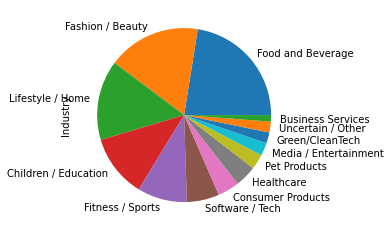

In [ ]:
# ENTER CODE HERE.

df_sharks[df_sharks["Deal"] == "Yes"]["Industry"].value_counts().plot.pie()

**YOUR EXPLANATION HERE**

Of the companies funded, the Food and Beverage industry is by far the most prefered, closly followed by Fashion/Beauty.


## Submission Instructions

- Copy this notebook to your own Drive, if you have not already.
- Restart this notebook and run the cells from beginning to end. 
  - Go to Runtime > Restart and Run All.
- Rename this notebook by clicking on "DATA 301 Lab 2A - YOUR NAMES HERE" at the very top of this page. Replace "YOUR NAMES HERE" with the first and last names of you (and your partners, for Phase 2).
- Get the link to your notebook:
  - Click on "Share" at the top-right. 
  - Change the settings to "Anyone with the link can view". 
  - Copy the sharing link into Canvas.